<a href="https://colab.research.google.com/github/s4bih/machine-learning/blob/main/sakit_jantung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data collection

In [31]:
import pandas as pd
import re

google_drive_link = "https://drive.google.com/file/d/1OkVuzkVDGsgU1CdeRqUYQVaSXQ8BuJpr/view?usp=sharing"
file_id = re.search(r"/d/(\w+)/", google_drive_link).group(1)

url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)

#data processing


In [32]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [33]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [34]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [35]:
data['Sex'].value_counts()

,count
Sex,
1,183
0,87


In [36]:
data['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


In [37]:
data['Chest pain type'].value_counts()

,count
Chest pain type,
4,129
3,79
2,42
1,20


In [38]:
data['Heart Disease'] = data['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [39]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


#Explorarity Data Analysis(EDA)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


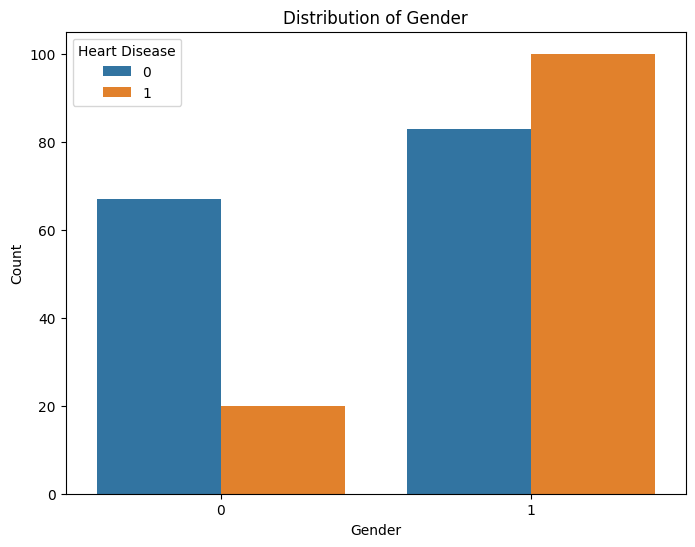

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex',hue = 'Heart Disease', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#distribution of heart disease by chest pain type

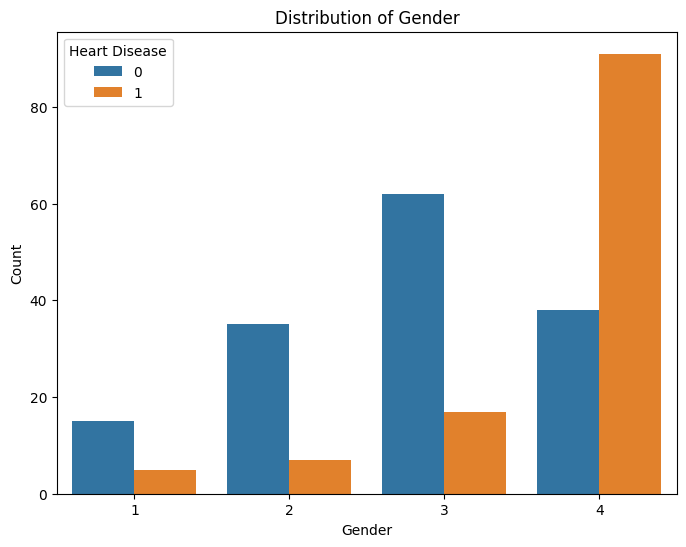

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Chest pain type',hue = 'Heart Disease', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

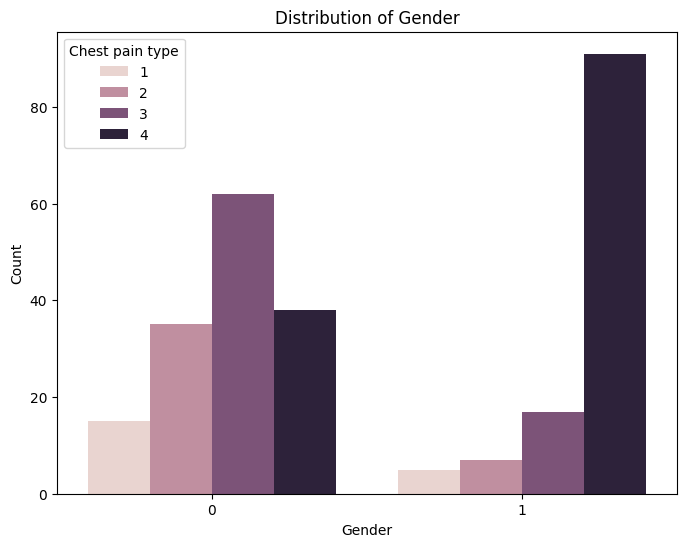

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Disease',hue = 'Chest pain type', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

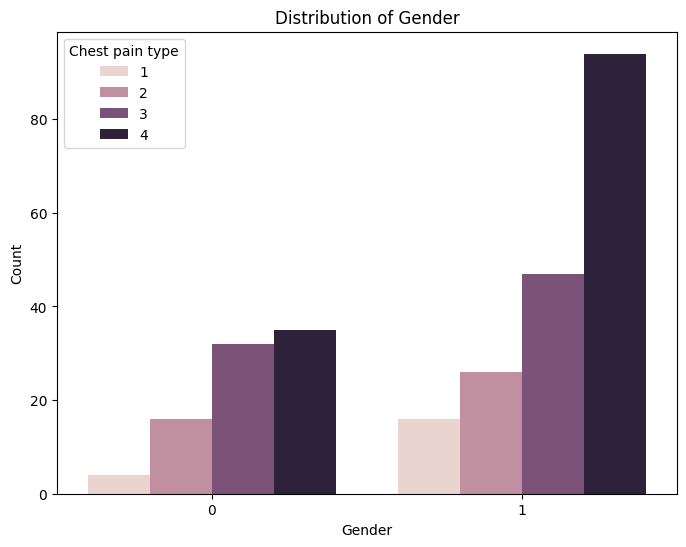

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex',hue = 'Chest pain type', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

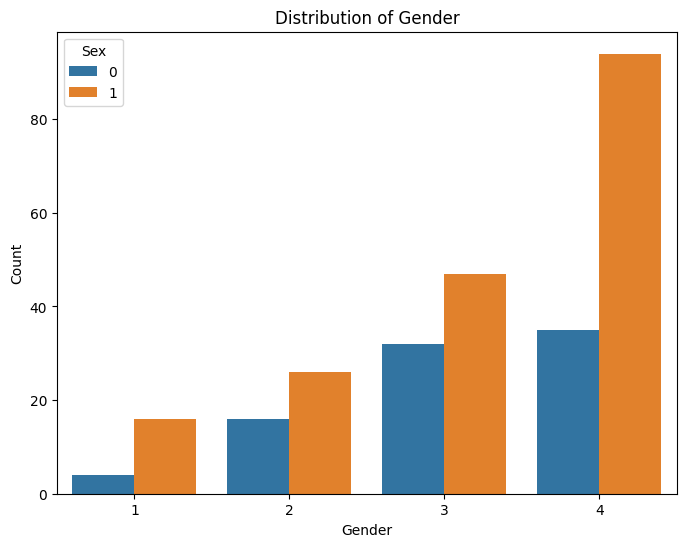

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Chest pain type',hue = 'Sex', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

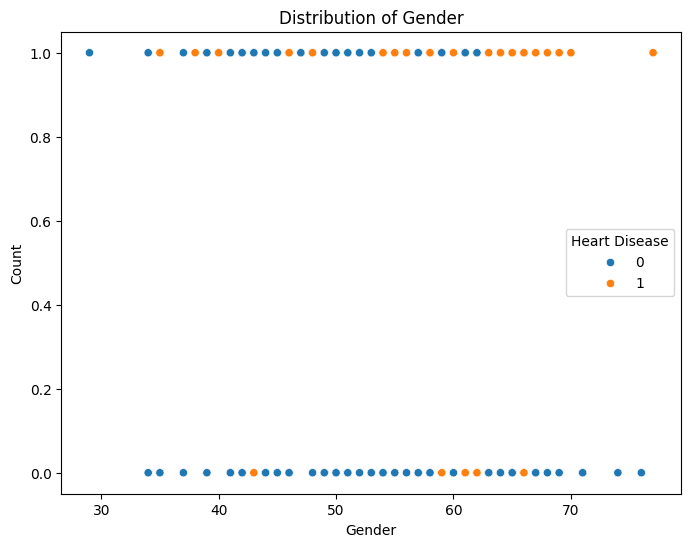

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age',y = 'Sex',hue = 'Heart Disease', data=data)

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

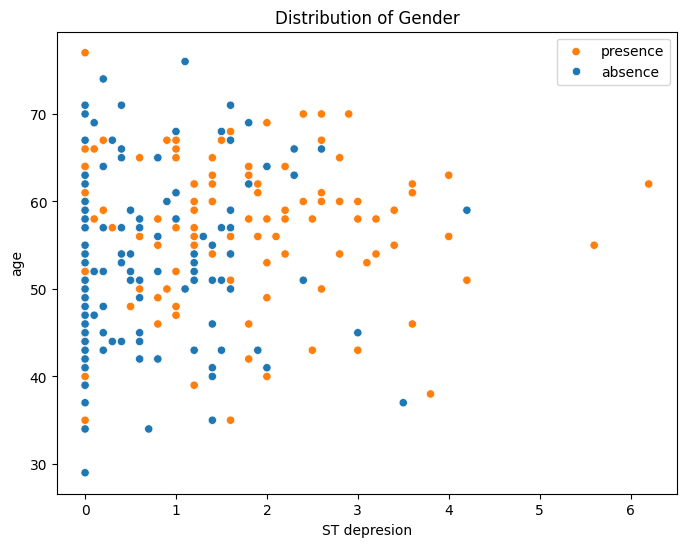

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ST depression',y = 'Age',hue = 'Heart Disease', data=data)

plt.title('Distribution of Gender')
plt.xlabel('ST depresion')
plt.ylabel('age')
plt.legend(labels = ['presence','absence'])
plt.show()

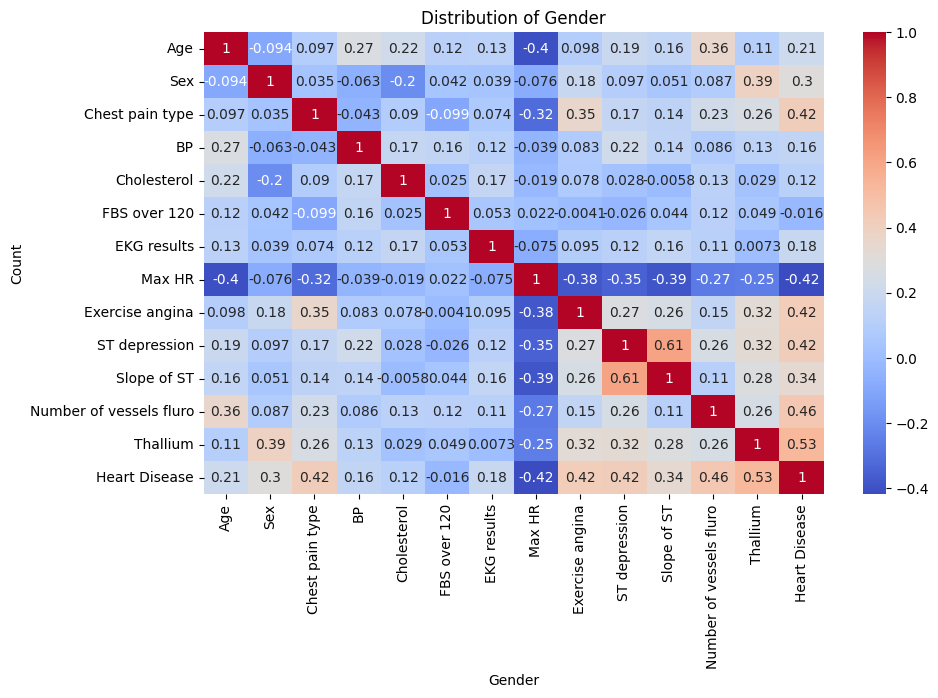

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# feature and target


In [49]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [50]:
feature = data.drop('Heart Disease',axis = 1)
target = data['Heart Disease']

# data splitting

In [51]:
from sklearn.model_selection import train_test_split

feature_train,feature_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 42)

# model training

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_classfier = KNeighborsClassifier(n_neighbors=5)
knn_classfier.fit(feature_train, target_train)

KNeighborsClassifier()

In [54]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(feature_train, target_train)

SVC(kernel='linear')

# evaluation

In [55]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

svm_prediction = svm_classifier.predict(feature_test)
knn_prediction = knn_classfier.predict(feature_test)

svm_accuracy = accuracy_score(target_test,svm_prediction)
knn_accuracy = accuracy_score(target_test,knn_prediction)

print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)

SVM Accuracy: 0.8703703703703703
KNN Accuracy: 0.6481481481481481


In [56]:
print('SVM Classification Report:')
print(classification_report(target_test, svm_prediction))

print('KNN Classification Report:')
print(classification_report(target_test, knn_prediction))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.85      0.81      0.83        21

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        33
           1       0.54      0.62      0.58        21

    accuracy                           0.65        54
   macro avg       0.64      0.64      0.64        54
weighted avg       0.66      0.65      0.65        54



# prediction

In [58]:
single_data_point_dict = {
    'Age': 57,
    'Sex': 1,
    'Chest pain type': 2,
    'BP': 124,
    'Cholesterol': 261,
    'FBS over 120': 0,
    'EKG results': 0,
    'Max HR': 141,
    'Exercise angina': 0,
    'ST depression': 0.3,
    'Slope of ST': 1,
    'Number of vessels fluro': 0,
    'Thallium': 7
}

In [59]:
single_data_point_df = pd.DataFrame([single_data_point_dict])
#use svm
predicted_class = svm_classifier.predict(single_data_point_df)

if predicted_class[0] == 1:
    print("The person has heart disease.")
else:
    print("The person does not have heart disease.")

The person does not have heart disease.
